In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
features = pd.read_csv('train_data.csv')
features['experience_level'] = pd.Categorical(features['experience_level']).codes
features['skill_set'] = pd.Categorical(features['skill_set']).codes
features['job_site'] = pd.Categorical(features['job_site']).codes
X = features.drop(['job_site', 'name', 'availability', 'health_status', 'worker_id'], axis=1)
y = features['job_site']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = RandomForestClassifier(n_estimators=8, random_state=42)
model.fit(X, y)
y_pred = model.predict(X_test)
print(y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))

[-1  5  4  6 -1 -1  4 -1 -1  5 -1 -1 -1 -1 -1  1  2 -1 -1 -1  5 -1 -1  1
 -1 -1 -1  3  1 -1 -1  1 -1 -1  4 -1  9 -1 -1  0  1  5 -1 -1 -1 -1  0  5
  8 -1  7 -1 -1  5 -1 -1  3 -1 -1  1 -1  8 -1 -1  9 -1 -1 -1  4  1  8  2
 -1  1  5 -1 -1 -1 -1 -1 -1 -1 -1  9 -1  0 -1  8 -1 -1 -1 -1 -1 -1  2 -1
 -1 -1  2  4 -1 -1 -1  9 -1 -1 -1  0 -1 -1 -1 -1  1  4  0 -1 -1  1 -1 -1
 -1  5  4  9  2 -1  8  6 -1 -1 -1 -1 -1 -1  9 -1 -1 -1  1  3 -1 -1 -1 -1
 -1 -1 -1  1  2 -1 -1 -1  7 -1 -1  8 -1 -1  2 -1  7  2 -1 -1 -1 -1 -1 -1
  4 -1  6 -1 -1 -1  3 -1 -1 -1 -1  3  3 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1]
Accuracy: 0.74


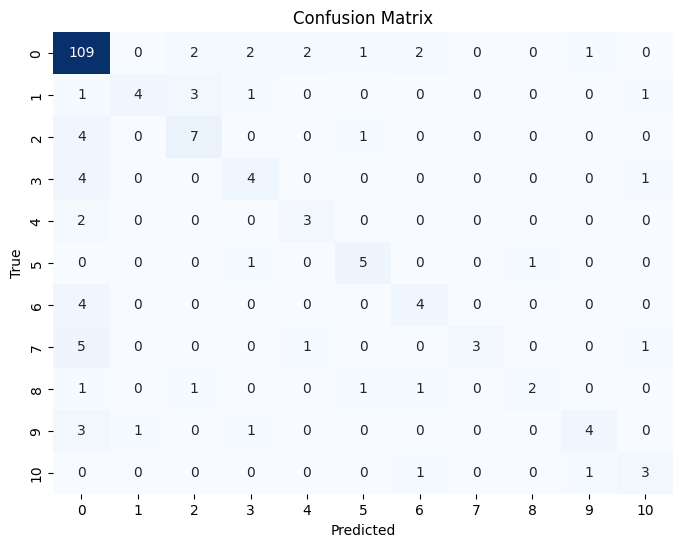

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


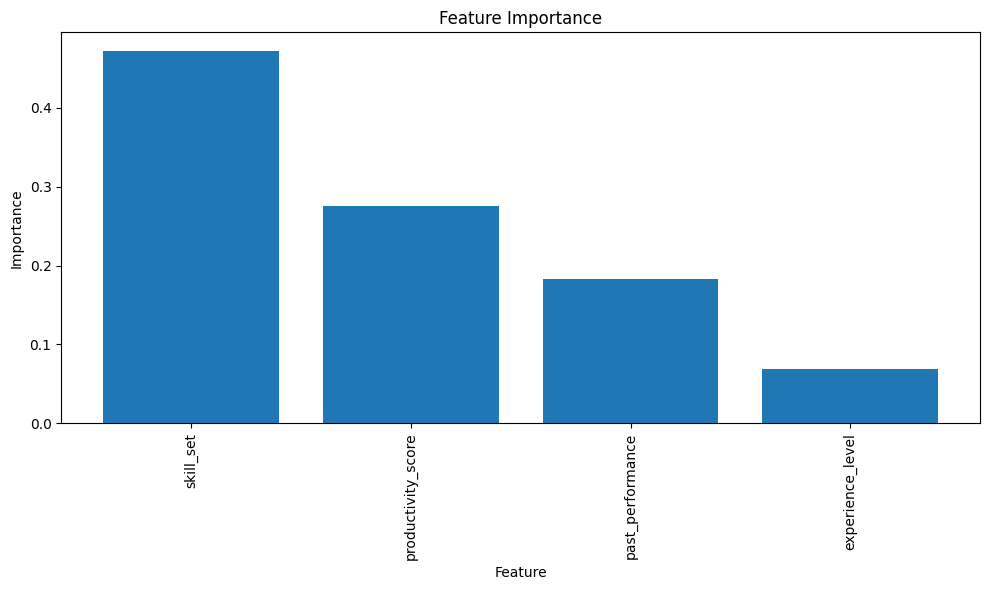

In [60]:
# Assuming model is already defined and fitted
import numpy as np
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
